In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plot

In [2]:
data = load_wine()   # data load 
data.target[[10, 80, 140]]
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.columns)
df.head()

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
X = df.iloc[:,1:].to_numpy()
Y = df.iloc[:,0].to_numpy()
wineNames = np.array(data.feature_names[1:])
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 531)
print(len(xTrain), len(xTest))
mseOos = []
nTreeList = range(50, 500, 10)

for iTrees in nTreeList:
    depth = None
    maxFeat = 4 #조정해볼 것
    wineRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth, max_features=maxFeat,
                    oob_score=False, random_state=531)
    wineRFModel.fit(xTrain, yTrain)
    #데이터 세트에 대한 MSE 누적
    prediction = wineRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))
print("MSE")
print(mseOos)

124 54
MSE
[0.2281104644444446, 0.22561189557613182, 0.23015219312169327, 0.22492989496527804, 0.22521746822130861, 0.2255401290740759, 0.22431394337312702, 0.22461946013374623, 0.2248307738330058, 0.22393326596749977, 0.2250649320164623, 0.22748563982928366, 0.22722601179033852, 0.22682433944901903, 0.226786722632607, 0.2260829955555581, 0.22557619085412192, 0.2251456657866573, 0.22361623773017136, 0.2257747494212992, 0.2259692611555583, 0.22513276320403552, 0.22621255652085884, 0.22659414096750133, 0.2258626338794237, 0.22521719063786344, 0.22622014674143745, 0.2264371565212706, 0.22623065906540418, 0.22605856263616808, 0.2263693855479988, 0.22663400547268145, 0.22629657075995105, 0.2260166124705056, 0.22573079286288425, 0.2255858574074091, 0.2251062386145828, 0.2252903874506609, 0.22534828486869932, 0.22517725471571962, 0.22511500084133684, 0.22520827486347572, 0.2246211656187667, 0.22529144129372583, 0.22544331972017972]


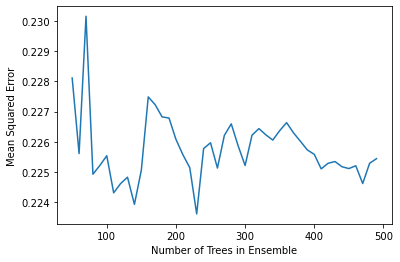

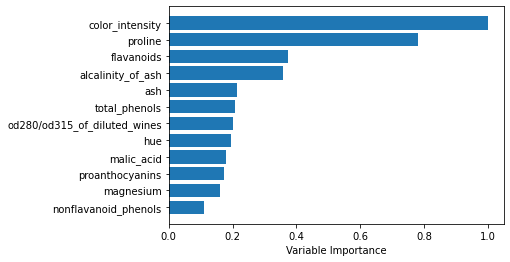

In [4]:
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()

#피처 중요도 도표 그리기
featureImportance = wineRFModel.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, wineNames[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()